In [2]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

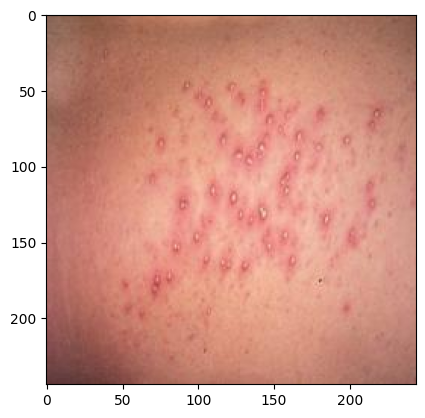

In [3]:
# Load the train image for review
img_path = image.load_img('C:/Users/adamg/Desktop/AI AND DATASET/tugas besar/facial disease/facial_disease/train/acne/ac3_jpg.rf.4341c6b53528d2781adf674ce77d0ee0.jpg')

# show the image
plt.imshow(img_path)
plt.show()

In [4]:
# Create the train generator
train_dir = os.path.join('C:/Users/adamg/Desktop/AI AND DATASET/tugas besar/facial disease/facial_disease/train/')
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=40,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode = 'nearest',
    validation_split=0.2)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(244, 244),
    batch_size=8,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(244, 244),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

Found 320 images belonging to 5 classes.
Found 78 images belonging to 5 classes.


In [6]:
# check the batch size and the class
print(train_generator.class_indices)
print(validation_generator.class_indices)
print(train_generator.batch_size)

{'acne': 0, 'eksim': 1, 'herpes': 2, 'panu': 3, 'rosacea': 4}
{'acne': 0, 'eksim': 1, 'herpes': 2, 'panu': 3, 'rosacea': 4}
8


In [7]:
# Get batch shape
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (8, 244, 244, 3)
labels batch shape: (8, 5)


In [8]:
# Create the model with the best model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(244, 244, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')  
])

# Proses Training menggunakan Callback agar tidak Overfitting

In [9]:
# Compile the model with adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Terminate the training if the model is overfitting
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [11]:
# fit the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=100,
    verbose=2,
    callbacks=[early_stop]
)

Epoch 1/100


40/40 - 13s - loss: 15.2713 - accuracy: 0.1937 - val_loss: 13.4331 - val_accuracy: 0.2051 - 13s/epoch - 335ms/step
Epoch 2/100
40/40 - 11s - loss: 12.1385 - accuracy: 0.2000 - val_loss: 10.9291 - val_accuracy: 0.2051 - 11s/epoch - 266ms/step
Epoch 3/100
40/40 - 11s - loss: 10.0480 - accuracy: 0.2313 - val_loss: 9.2212 - val_accuracy: 0.2436 - 11s/epoch - 265ms/step
Epoch 4/100
40/40 - 11s - loss: 8.5862 - accuracy: 0.2375 - val_loss: 7.9763 - val_accuracy: 0.2051 - 11s/epoch - 265ms/step
Epoch 5/100
40/40 - 10s - loss: 7.4916 - accuracy: 0.2250 - val_loss: 7.0179 - val_accuracy: 0.2308 - 10s/epoch - 260ms/step
Epoch 6/100
40/40 - 11s - loss: 6.6265 - accuracy: 0.2656 - val_loss: 6.2542 - val_accuracy: 0.2179 - 11s/epoch - 264ms/step
Epoch 7/100
40/40 - 11s - loss: 5.9559 - accuracy: 0.1937 - val_loss: 5.6508 - val_accuracy: 0.2436 - 11s/epoch - 263ms/step
Epoch 8/100
40/40 - 11s - loss: 5.3914 - accuracy: 0.2625 - val_loss: 5.1390 - val_accuracy: 0.2051 - 11s/epoch - 266m

In [12]:
# Check the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 242, 242, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 121, 121, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 59, 59, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 59, 59, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 57, 57, 64)        1

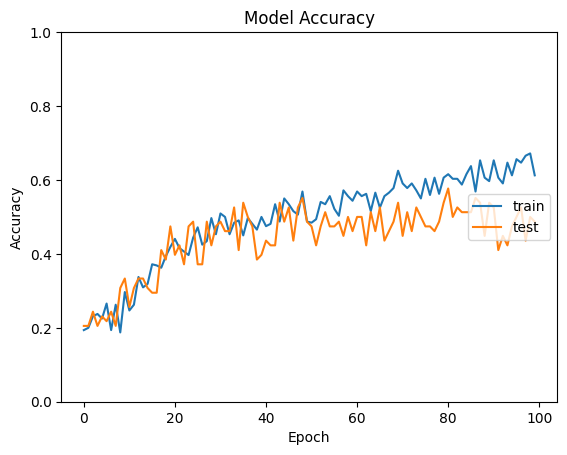

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(['train', 'test'], loc='right')
plt.savefig('accuracy.png')
plt.show()

<Figure size 640x480 with 0 Axes>

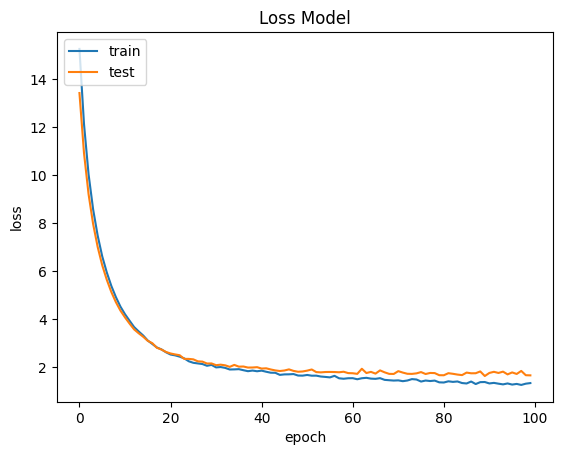

In [21]:
# Plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss.png')
plt.show()

In [15]:
# Save the model for stage 1
model.save('facial_disease_pre2.h5')

c:\Program Files\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Proses Training Ke-2 untuk menambah akurasi

In [22]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        # Stop the training if the accuracy is more than 90%
        if(logs.get('accuracy') > 0.90):
            print("\nThe accuracy is reaching 90%! Terminating the training...\n")
            self.model.stop_training = True

In [23]:
callbacks = myCallback()
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_callback = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=100,
    verbose=2,
    callbacks=[callbacks, early_stop]
)

Epoch 1/100
40/40 - 11s - loss: 1.3135 - accuracy: 0.6469 - val_loss: 1.7381 - val_accuracy: 0.5385 - 11s/epoch - 272ms/step
Epoch 2/100
40/40 - 10s - loss: 1.2531 - accuracy: 0.6531 - val_loss: 1.6948 - val_accuracy: 0.4872 - 10s/epoch - 259ms/step
Epoch 3/100
40/40 - 10s - loss: 1.2457 - accuracy: 0.6406 - val_loss: 1.7039 - val_accuracy: 0.4872 - 10s/epoch - 260ms/step
Epoch 4/100
40/40 - 10s - loss: 1.3082 - accuracy: 0.6406 - val_loss: 1.6902 - val_accuracy: 0.5128 - 10s/epoch - 257ms/step
Epoch 5/100
40/40 - 10s - loss: 1.2705 - accuracy: 0.6438 - val_loss: 1.8254 - val_accuracy: 0.4744 - 10s/epoch - 258ms/step
Epoch 6/100
40/40 - 10s - loss: 1.3584 - accuracy: 0.6156 - val_loss: 1.6671 - val_accuracy: 0.5128 - 10s/epoch - 256ms/step
Epoch 7/100
40/40 - 10s - loss: 1.3441 - accuracy: 0.6344 - val_loss: 1.6458 - val_accuracy: 0.5385 - 10s/epoch - 259ms/step
Epoch 8/100
40/40 - 10s - loss: 1.3593 - accuracy: 0.6031 - val_loss: 1.6971 - val_accuracy: 0.5385 - 10s/epoch - 256ms/step


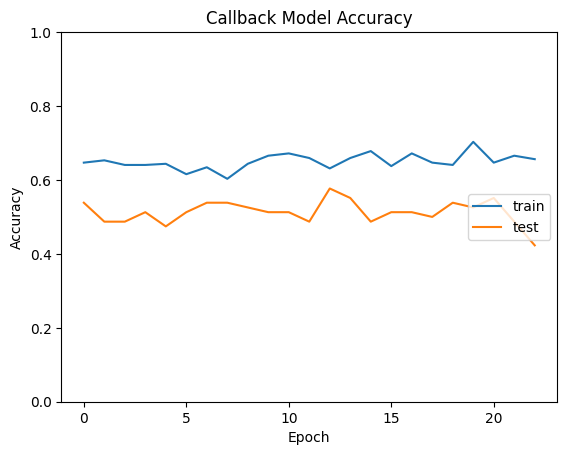

In [24]:
# Plot the callback accuracy
plt.plot(history_callback.history['accuracy'], label='accuracy')
plt.plot(history_callback.history['val_accuracy'], label = 'val_accuracy')
plt.title('Callback Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(['train', 'test'], loc='right')
plt.show()

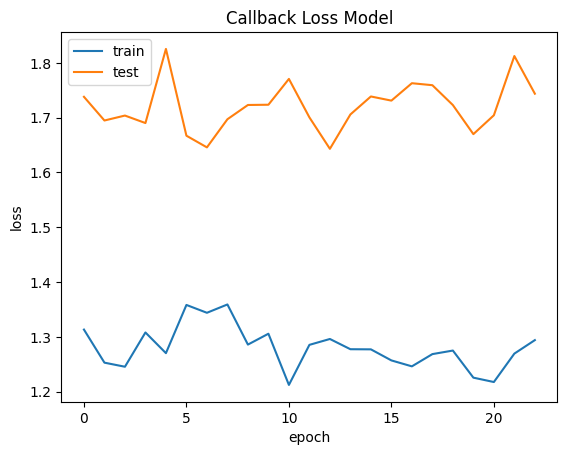

In [25]:
# Plot the callback loss
plt.plot(history_callback.history['loss'])
plt.plot(history_callback.history['val_loss'])
plt.title('Callback Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
test_dir = os.path.join('../facial disease/facial_disease/test')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(244, 244),
    batch_size=16,
    class_mode='categorical'
)

Found 100 images belonging to 5 classes.


In [27]:
# Make the prediction
predictions = model.predict(test_generator)
print(predictions)

7/7 [==============================] - 1s 69ms/step
[[5.81084415e-02 5.14998920e-02 5.46519272e-02 6.07712492e-02
  7.74968505e-01]
 [2.67540097e-01 1.85091645e-01 1.34248823e-01 1.45815834e-01
  2.67303556e-01]
 [2.10494012e-01 1.62432671e-01 3.44539851e-01 1.81392193e-01
  1.01141341e-01]
 [1.17132568e-03 2.93050613e-02 5.28052077e-03 5.41430316e-04
  9.63701606e-01]
 [8.15871060e-02 2.05423772e-01 6.55532897e-01 1.50597459e-02
  4.23964299e-02]
 [1.08489864e-01 4.54968452e-01 2.20699281e-01 3.14115733e-02
  1.84430882e-01]
 [8.96853507e-02 3.15018833e-01 4.80425835e-01 2.13973485e-02
  9.34725478e-02]
 [2.02660281e-02 2.04679504e-01 7.55858719e-01 3.18192714e-03
  1.60137806e-02]
 [1.88133158e-02 6.15336001e-02 1.71402544e-01 2.80796993e-03
  7.45442510e-01]
 [2.74556456e-04 2.38926988e-03 2.43064668e-03 4.40371332e-05
  9.94861543e-01]
 [2.78130602e-02 9.24095660e-02 4.55274433e-01 4.22254484e-03
  4.20280397e-01]
 [6.27919510e-02 1.16151586e-01 1.68450564e-01 2.24598050e-02
  6.30

In [28]:
# Evaluate the model
print("Model Evaluation:")
model.evaluate(test_generator)

Model Evaluation:
7/7 [==============================] - 0s 60ms/step - loss: 1.6432 - accuracy: 0.5200


[1.6432446241378784, 0.5199999809265137]

# Hasil Pembuatan Model :

In [29]:
# Make the Result of Model Prediction
result = np.argmax(predictions, axis=1)
print('Result : ')
print(result)

Result : 
[4 0 2 4 2 1 2 2 4 4 2 4 4 0 2 1 1 3 0 1 2 4 3 4 4 3 2 2 3 2 4 0 4 0 2 1 0
 2 4 4 4 4 3 4 3 4 3 0 3 2 3 2 2 3 2 1 0 3 3 4 4 3 4 4 3 2 4 4 1 4 4 4 4 2
 3 4 0 2 1 4 3 3 3 2 2 4 2 1 2 4 3 2 2 3 3 0 3 4 2 0]


In [30]:
# Review the result
print('Review the result : ')
for i in range(0, len(result)):
    if result[i] == 0:
        print('The image is Acne')
    elif result[i] == 1:
        print('The image is Eksim')
    elif result[i] == 2:
        print('The image is Herpes')
    elif result[i] == 3:
        print('The image is Panu')
    elif result[i] == 4:
        print('The image is Rosacea')

Review the result : 
The image is Rosacea
The image is Acne
The image is Herpes
The image is Rosacea
The image is Herpes
The image is Eksim
The image is Herpes
The image is Herpes
The image is Rosacea
The image is Rosacea
The image is Herpes
The image is Rosacea
The image is Rosacea
The image is Acne
The image is Herpes
The image is Eksim
The image is Eksim
The image is Panu
The image is Acne
The image is Eksim
The image is Herpes
The image is Rosacea
The image is Panu
The image is Rosacea
The image is Rosacea
The image is Panu
The image is Herpes
The image is Herpes
The image is Panu
The image is Herpes
The image is Rosacea
The image is Acne
The image is Rosacea
The image is Acne
The image is Herpes
The image is Eksim
The image is Acne
The image is Herpes
The image is Rosacea
The image is Rosacea
The image is Rosacea
The image is Rosacea
The image is Panu
The image is Rosacea
The image is Panu
The image is Rosacea
The image is Panu
The image is Acne
The image is Panu
The image is Herp

In [34]:
# Show the Accuracy
print('The accuracy is : ')
print(history_callback.history['accuracy'][-1] * 100)

The accuracy is : 
65.625


In [35]:
# Save the model
model.save('facial_disease_model.h5')

c:\Program Files\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
